In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [22]:
train_df.head(4)

,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,...,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
0,0.21,0.00,0.42,0.25,0.12,-0.021782,1.981251,0.020036,0.140315,1.032029,...,0.489143,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738
1,0.02,0.33,0.19,0.46,0.00,-0.224339,1.148036,-1.107840,0.149533,-0.354000,...,-1.257481,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625
2,0.08,0.08,0.18,0.50,0.16,0.457763,0.242591,-0.922492,0.908213,0.972003,...,1.784349,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576
3,0.25,0.42,0.00,0.07,0.26,-0.577734,-0.930826,0.815284,0.447514,0.455717,...,-0.066422,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914


In [23]:
test_df.head(4)

,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,...,Component1_Property9,Component2_Property9,Component3_Property9,Component4_Property9,Component5_Property9,Component1_Property10,Component2_Property10,Component3_Property10,Component4_Property10,Component5_Property10
0,0.18,0.05,0.32,0.37,0.08,-0.177804,-0.741219,0.769821,-0.877069,0.602809,...,-0.265376,0.123432,0.028533,-0.173365,1.297923,0.323299,-0.315146,0.625518,-0.514342,-0.777057
1,0.00,0.50,0.00,0.37,0.13,2.501354,0.177344,-0.498739,-0.196742,-1.943463,...,-0.787677,-0.757905,-0.280561,-1.965970,0.543475,-0.906851,0.962341,-0.183757,0.310871,-1.329042
2,0.16,0.00,0.17,0.50,0.17,1.547324,0.891479,0.030627,-0.368678,-0.294728,...,-0.710026,-1.422693,0.874071,-1.016144,0.093525,1.048525,-1.321851,0.356640,-0.869543,-0.177255
3,0.50,0.00,0.17,0.16,0.17,-0.424427,1.016862,-1.182979,-0.854225,-0.830186,...,-0.551366,0.257105,-0.077337,-0.721031,-0.760365,-0.507690,1.346556,-0.001529,-1.008445,1.726105


In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Component1_fraction    2000 non-null   float64
 1   Component2_fraction    2000 non-null   float64
 2   Component3_fraction    2000 non-null   float64
 3   Component4_fraction    2000 non-null   float64
 4   Component5_fraction    2000 non-null   float64
 5   Component1_Property1   2000 non-null   float64
 6   Component2_Property1   2000 non-null   float64
 7   Component3_Property1   2000 non-null   float64
 8   Component4_Property1   2000 non-null   float64
 9   Component5_Property1   2000 non-null   float64
 10  Component1_Property2   2000 non-null   float64
 11  Component2_Property2   2000 non-null   float64
 12  Component3_Property2   2000 non-null   float64
 13  Component4_Property2   2000 non-null   float64
 14  Component5_Property2   2000 non-null   float64
 15  Comp

In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Component1_fraction    500 non-null    float64
 1   Component2_fraction    500 non-null    float64
 2   Component3_fraction    500 non-null    float64
 3   Component4_fraction    500 non-null    float64
 4   Component5_fraction    500 non-null    float64
 5   Component1_Property1   500 non-null    float64
 6   Component2_Property1   500 non-null    float64
 7   Component3_Property1   500 non-null    float64
 8   Component4_Property1   500 non-null    float64
 9   Component5_Property1   500 non-null    float64
 10  Component1_Property2   500 non-null    float64
 11  Component2_Property2   500 non-null    float64
 12  Component3_Property2   500 non-null    float64
 13  Component4_Property2   500 non-null    float64
 14  Component5_Property2   500 non-null    float64
 15  Compon

In [6]:
train_df.shape

(2000, 65)

In [7]:
test_df.shape

(500, 56)

In [9]:
train_df.describe()

,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,...,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.18069,0.182910,0.179820,0.342090,0.114490,0.000245,-0.017319,0.001703,-0.004653,-0.018256,...,-0.016879,-0.002076,-0.014351,-0.006068,-0.015249,-0.003497,-0.013568,-0.017236,-0.001507,-0.001795
std,0.16320,0.163704,0.166283,0.141119,0.080219,0.999423,1.006409,0.998859,1.006902,1.009294,...,0.993787,1.004512,0.999360,1.009176,0.986480,1.009126,1.000613,0.998759,1.001096,0.990433
min,0.00000,0.000000,0.000000,0.010000,0.000000,-2.943737,-1.718895,-3.008683,-3.029468,-3.572440,...,-2.550897,-3.079759,-3.041624,-2.835701,-1.730111,-2.808210,-2.994571,-3.621080,-3.292727,-2.476429
25%,0.03000,0.040000,0.020000,0.220000,0.050000,-0.694658,-0.765154,-0.701948,-0.693361,-0.713149,...,-0.766128,-0.735109,-0.624235,-0.783547,-0.683165,-0.697379,-0.622453,-0.725564,-0.702384,-0.733653
50%,0.14000,0.150000,0.140000,0.350000,0.120000,0.011977,-0.030235,0.021335,0.016774,0.194936,...,-0.021089,0.001684,0.146135,-0.028158,-0.250650,-0.011649,0.133470,-0.001548,-0.002604,-0.010459
75%,0.29000,0.300000,0.290000,0.500000,0.180000,0.685717,0.653960,0.673125,0.659227,1.032029,...,0.714763,0.723807,0.727597,0.664659,0.358701,0.695182,0.704130,0.684894,0.706084,0.693839
max,0.50000,0.500000,0.500000,0.500000,0.290000,2.981146,3.051090,2.868901,2.982258,1.032029,...,2.856588,2.769156,1.638646,3.769643,3.600439,3.433292,3.293228,3.340657,3.276199,2.708703


In [10]:
test_df.describe()

,ID,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,...,Component1_Property9,Component2_Property9,Component3_Property9,Component4_Property9,Component5_Property9,Component1_Property10,Component2_Property10,Component3_Property10,Component4_Property10,Component5_Property10
count,500.000000,500.00000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,0.19266,0.169500,0.18060,0.339940,0.117300,-0.000981,0.069276,-0.006813,0.018611,...,0.062825,-0.020151,-0.045733,-0.002185,-0.057889,-0.013324,0.015065,0.008556,-0.021056,0.002911
std,144.481833,0.16821,0.160552,0.16355,0.140342,0.077806,1.003309,0.971843,1.005525,0.972667,...,1.017019,1.031717,0.962440,0.967252,1.001386,1.008496,1.000280,0.960072,0.994926,0.993672
min,1.000000,0.00000,0.000000,0.00000,0.030000,0.000000,-2.768830,-1.718895,-3.008683,-3.029468,...,-2.806614,-1.422693,-3.126649,-2.970316,-3.390542,-2.943079,-1.805664,-2.515751,-2.787010,-3.124985
25%,125.750000,0.05000,0.020000,0.03000,0.230000,0.050000,-0.645530,-0.664430,-0.680915,-0.629136,...,-0.603227,-0.868347,-0.669957,-0.629020,-0.791983,-0.709414,-0.679735,-0.580943,-0.715264,-0.754448
50%,250.500000,0.15000,0.130000,0.14000,0.350000,0.120000,0.026296,0.051025,-0.013937,-0.004668,...,0.088419,-0.121820,-0.040108,0.054975,0.020095,-0.039927,0.040192,0.027648,-0.014089,-0.040731
75%,375.250000,0.30250,0.262500,0.29000,0.500000,0.170000,0.653994,0.728789,0.622842,0.637585,...,0.763869,0.696087,0.568572,0.644322,0.673265,0.694232,0.657840,0.624103,0.661458,0.743066
max,500.000000,0.50000,0.500000,0.50000,0.500000,0.280000,2.981146,3.051090,2.986405,2.828759,...,2.712902,3.257945,2.715674,2.881882,1.687020,3.045961,3.035925,2.585761,3.029461,1.726105


In [28]:
X = train_df.iloc[:,:55]  # First 55 columns = inputs
y = train_df.iloc[:,55:]  # Last 10 columns = target blend properties

In [11]:
# fill missing values if any (for safety)
X.fillna(X.mean(), inplace=True)
test_df.fillna(test_df.mean(), inplace=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_7868\2230901778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [14]:
# Train-test split for local validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Model: Multi-output Random Forest
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

,estimator,RandomForestR...ndom_state=42)
,n_jobs,None
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0


In [16]:
# Validation MAPE
y_pred_val = model.predict(X_val)
mape_score = mean_absolute_percentage_error(y_val, y_pred_val)
print(f"Validation MAPE: {mape_score:.4f}")

Validation MAPE: 4.2489


In [19]:
# Drop 'ID' if it exists
if 'ID' in test_df.columns:
    test_df = test_df.drop(columns=['ID'])

# Fill missing values if any
test_df.fillna(test_df.mean(), inplace=True)

# Predict
test_preds = model.predict(test_df)

In [20]:
# Create submission DataFrame
submission = pd.DataFrame(test_preds, columns=[f'BlendProperty{i+1}' for i in range(10)])

In [21]:
# Save submission
submission.to_csv("submission.csv", index=False)
print("Submission file saved as 'submission.csv'")

Submission file saved as 'submission.csv'


# Plotting

### 1. True vs Predicted Plot 

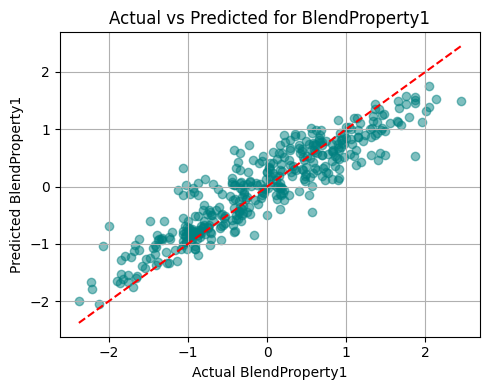

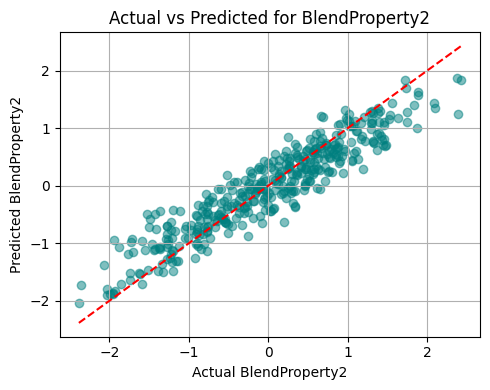

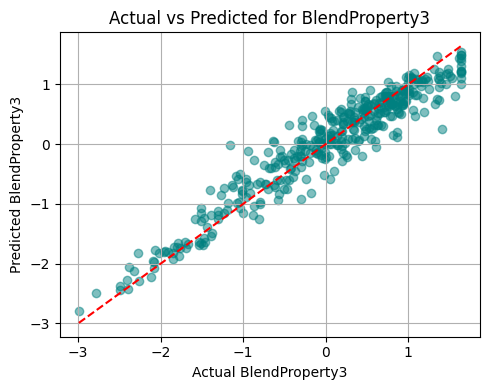

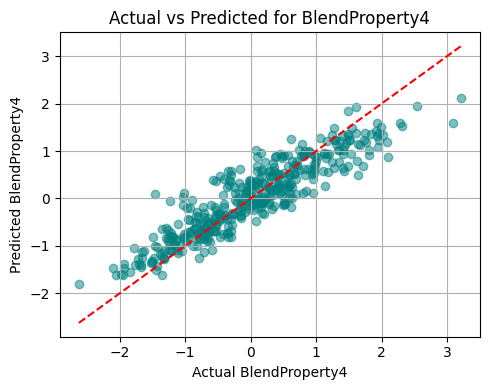

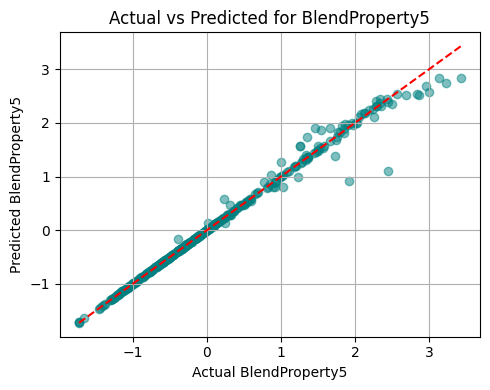

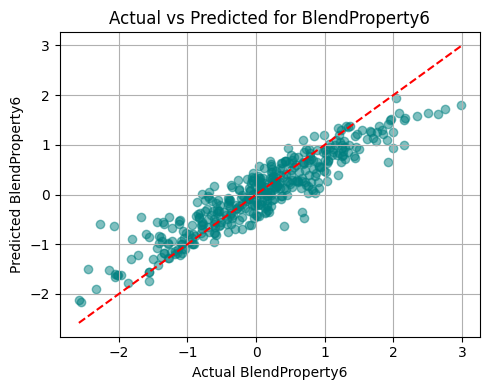

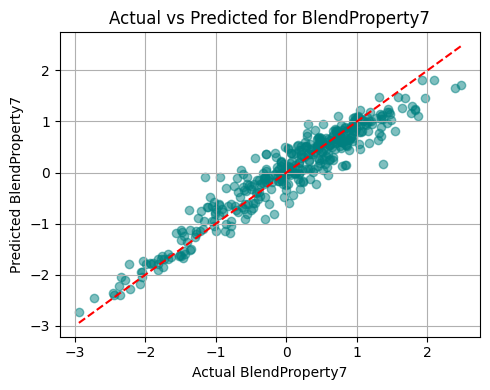

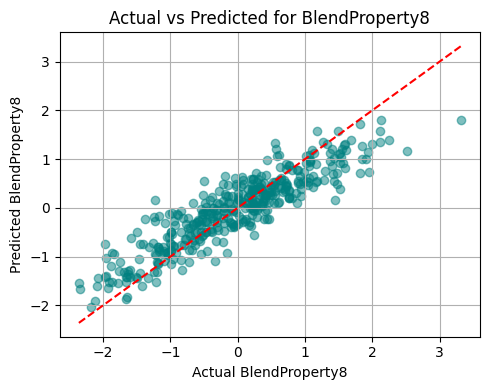

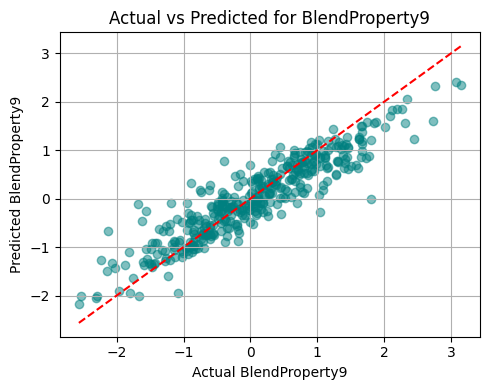

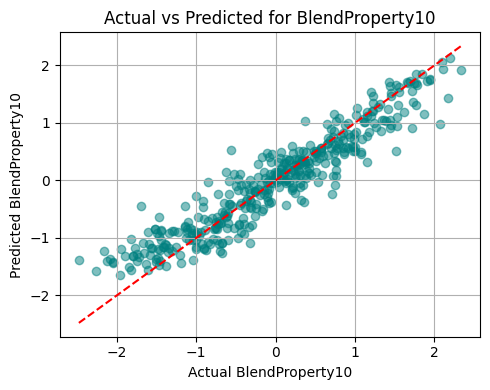

In [29]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.figure(figsize=(5, 4))
    plt.scatter(y_val.iloc[:, i], y_pred_val[:, i], alpha=0.5, color='teal')
    plt.xlabel(f"Actual BlendProperty{i+1}")
    plt.ylabel(f"Predicted BlendProperty{i+1}")
    plt.title(f"Actual vs Predicted for BlendProperty{i+1}")
    plt.plot([y_val.iloc[:, i].min(), y_val.iloc[:, i].max()],
             [y_val.iloc[:, i].min(), y_val.iloc[:, i].max()],
             'r--')  # perfect prediction line
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### 2. Error Distribution Plot

C:\Users\prash\AppData\Local\Temp\ipykernel_7868\3691512817.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(errors, labels=[f'BP{i+1}' for i in range(10)])


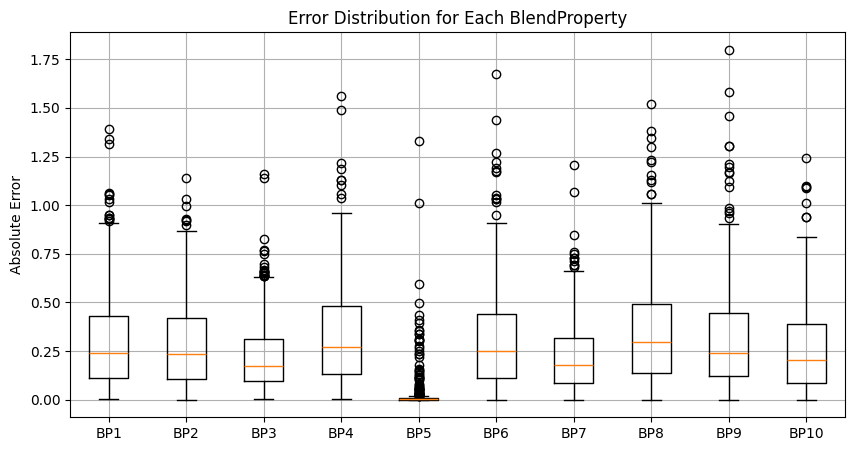

In [30]:
import numpy as np

errors = np.abs(y_pred_val - y_val.values)

plt.figure(figsize=(10, 5))
plt.boxplot(errors, labels=[f'BP{i+1}' for i in range(10)])
plt.ylabel("Absolute Error")
plt.title("Error Distribution for Each BlendProperty")
plt.grid(True)
plt.show()
